Expectation–Maximization (EM) Algorithm Lab
-----


By The End Of This Session You Should Be Able To:
----
- Apply EM to find the mixture of two Guassian Distrubtions

In [6]:
reset -fs

In [7]:
from random import uniform
from math import sqrt, log, exp, pi

import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_csv("../../../data/em_example.csv")
df.head(n=2)

,x
0,0.252851
1,-1.034562


__TODO__: Plot distribution

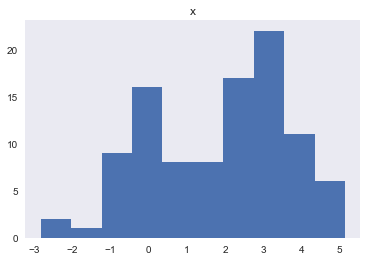

In [9]:
# Solution:  
df.hist(grid=False);

__TODO__: Is the normal distribution a useful model for the data?

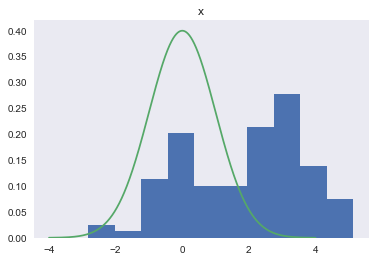

In [10]:
# Solution:  
df.hist(grid=False,
       normed=True);
x_values = np.arange(-4, 4, 0.001)
plt.plot(x_values, stats.norm.pdf(x_values,0,1));

__TODO__: Plot a KDE on the data:

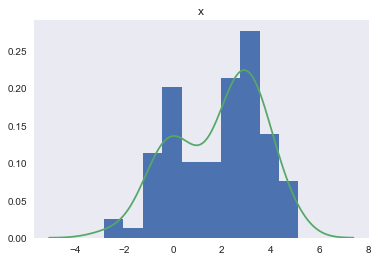

In [11]:
# Solution:  
df.hist(grid=False,
       normed=True);
sns.kdeplot(df.x,
           legend=False);

__TODO__:  What model should we fit?

__Solution__:  
> X appears to be a mixture of two Normal distributions

__TODO__:  Define the model:

<br>
<details><summary>
Click here for a small hint…
</summary>
The model is should be the simplest that is able generate that figure
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>
The model is two Normal distributions
</details>

__Solution__:   
In the Normal mixture example, we have two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 



__TODO__:  List the model parameters:

<br>
<details><summary>
Click here for a small hint…
</summary>
There are 5 paramaters
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>
There are 5 paramaters: 4 of the them are Normal distributions, the last one is the probability of choosing one of them
</details>


__Solution__:   
Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

__TODO__:  Define pdf:

__Solution__:  
The PDF is:


$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  


$X$ is the observed data, $Z$ is the unobserved class membership.   

Let $Z = 1$ if the data comes from the first Normal, and $0$ otherwise, then $E(Z) = w$. 

__TODO__:  Write the E  step. Either formally or informally.

__Solution__:  
* In the E step we can obtain:   

$$ \pi_i = E(Z \ | \  x_i, \theta^{(t)}) = \frac{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}})}{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}}) + (1 - w^{(t)}) \ f_2(x_i \ |\ \mu_2^{(t)}, \sigma_2^{2^{(t)}})} $$


__TODO__:  Write the M step. Either formally or informally.

__Solution__:  
* In the M step, we have the familiar MLE of the parameters:  

$$ \mu_1^{(t + 1)} = \frac{\sum_{i = 1}^n \pi_i x_i}{\sum_{i = 1}^n \pi_i} $$



$$ \sigma_1^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n \pi_i (x_i - \mu_1^{(t + 1)})^2}{\sum_{i = 1}^n \pi_i} $$  



$$ \mu_2^{(t + 1)} = \frac{\sum_{i = 1}^n (1 - \pi_i) x_i}{\sum_{i = 1}^n (1 - \pi_i)} $$



$$ \sigma_2^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n (1 - \pi_i) (x_i - \mu_2^{(t + 1)})^2}{\sum_{i = 1}^n (1 - \pi_i)} $$  



$$ w^{(t + 1)} = \frac{1}{n} \sum_{i = 1}^n \ \pi_i $$  

* Iterate these steps until convergence.  

In [12]:
class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y


In [13]:
# TODO:  Complete Gaussian Mixture class 
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        self.one = None # TODO: Create this attribute; What should the type be?
        self.two = None # TODO: Create this attribute; What should the type be?
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        pass

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        pass

    def iterate(self, N=1):
        "Perform N iterations, then compute log-likelihood"
        pass

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [35]:
# Solution:  
# HT: https://gist.github.com/kylebgorman/2992206
class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y


class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(rigt, data))
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep())
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [36]:
data = df.x

In [37]:
# TODO: Find best single Gaussian model

In [38]:
# Solution:  
g_single = Gaussian(mean(data), std(data))
print('Best single Guassian: μ = {:.2}, σ = {:.2}'.format(g_single.mu, g_single.sigma))

# uni_loglike = sum(log(g_single.pdf(d)) for d in data)
# print('Log likelihood: {:4.6}'.format(uni_loglike))

Best single Guassian: μ = 1.9, σ = 1.8


In [39]:
# TODO: Find best Mixture Gaussian model

In [42]:
# Solution:  
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError): # Catch division errors from bad starts, and just throw them out...
            pass
print('Done. 🙂')

Computing best model with random restarts...



/Users/brianspiering/anaconda3/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


Done. 🙂


In [43]:
print('Best Guassian Mixture:')
print('1st Guassian: μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma))
print('2nd Guassian: μ = {:.2}, σ = {:.2}'.format(best_mix.two.mu, best_mix.two.sigma))
print(f'Guassian mixture: {best_mix.mix:.2}')

# print('Log likelihood: {:4.6}'.format(best_gaus.loglike))
# test_stat = -2 * uni_loglike + 2 * best_gaus.loglike
# print('Test statistic for LLR (Chi-sq, df=3): 0:4.6}'.format(test_stat))

Best Guassian Mixture:
1st Guassian: μ = 2.3, σ = 1.6
2nd Guassian: μ = -0.42, σ = 0.51
Guassian mixture: 0.83


----
Challenge Activities
------

Plot the estimated pdfs, univariate and mixture

----
Lame attempts at plotting
----

In [44]:
# Plot fitted values
# df.hist(grid=False);
# x_values = x_values.sort()#np.arange(-4, 5, 0.001)
# plt.plot(x_values, stats.norm.pdf(x_values, g_single.mu, g_single.sigma**2)*10); # pdf has wrong scale

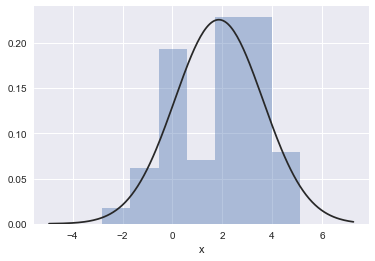

In [45]:
# Automated fit values; should be the same as my model
sns.distplot(df.x, fit=stats.norm, kde=False);

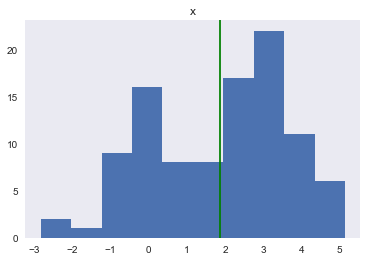

In [46]:
# Lame mu line
df.hist(grid=False);
plt.axvline(g_single.mu, color='g', linestyle='solid');

In [47]:
# TODO: plot both estimated univariate normal pdfs
# df.hist(grid=False);

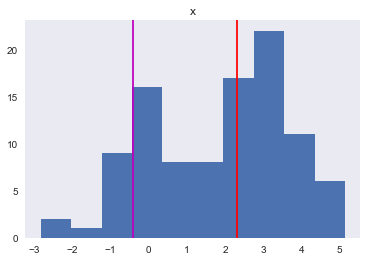

In [48]:
# If 1 mu line is lame, two are lamer!
df.hist(grid=False);
plt.axvline(best_mix.one.mu, color='r', linestyle='solid');
plt.axvline(best_mix.two.mu, color='m', linestyle='solid');

<br>
<br>